# <center> Customer Segment Prediction

## Import Libraries

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Task 1: Data Loading & Exploration

In [29]:
customer=pd.read_csv("Customers.csv")

In [30]:
customer

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [31]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [32]:
customer.shape

(200, 5)

In [33]:
customer.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [34]:
customer.nunique().sort_values()

Genre                       2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
CustomerID                200
dtype: int64

In [35]:
customer.isnull()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [36]:
customer.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<AxesSubplot:>

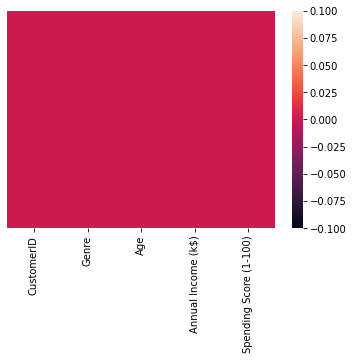

In [37]:
sns.heatmap(customer.isnull(),yticklabels=False)

## Task 2: Create Scatter Plot between Annual Income & Spending Score

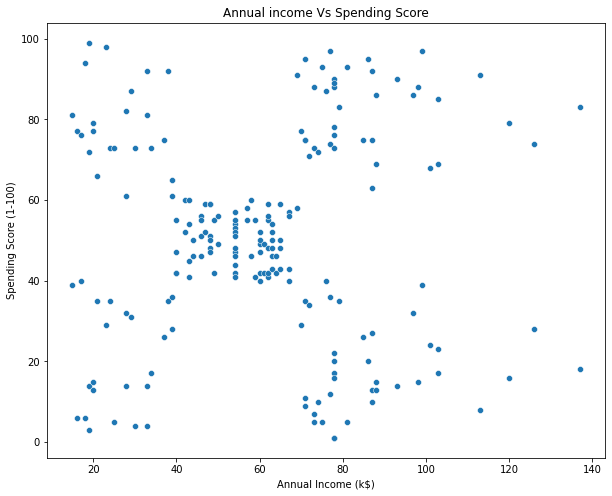

In [38]:
fig,ax=plt.subplots(figsize=(10,8))
sns.scatterplot(x=customer['Annual Income (k$)'],y=customer['Spending Score (1-100)'])
plt.title('Annual income Vs Spending Score')
plt.show()

## Task 3: Perform Scaling using MinMaxScaler

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler=MinMaxScaler()

In [41]:
scaler.fit(customer[['Annual Income (k$)']])
customer['Annual income_scaled']=scaler.transform(customer[['Annual Income (k$)']])                    

In [42]:
scaler.fit(customer[['Spending Score (1-100)']])
customer['Spending Score_scaled']=scaler.transform(customer[['Spending Score (1-100)']])  

In [43]:
customer

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Annual income_scaled,Spending Score_scaled
0,1,Male,19,15,39,0.000000,0.387755
1,2,Male,21,15,81,0.000000,0.816327
2,3,Female,20,16,6,0.008197,0.051020
3,4,Female,23,16,77,0.008197,0.775510
4,5,Female,31,17,40,0.016393,0.397959
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,0.860656,0.795918
196,197,Female,45,126,28,0.909836,0.275510
197,198,Male,32,126,74,0.909836,0.744898
198,199,Male,32,137,18,1.000000,0.173469


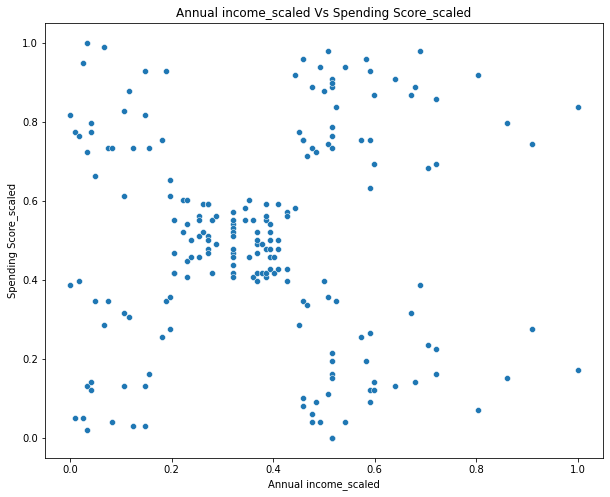

In [44]:
fig,ax=plt.subplots(figsize=(10,8))
sns.scatterplot(x=customer['Annual income_scaled'],y=customer['Spending Score_scaled'])
plt.title('Annual income_scaled Vs Spending Score_scaled')
plt.show()

## Task 4: Develop Clusters using KMeans

In [45]:
from sklearn.cluster import KMeans

In [47]:
elbow=[]
for i in range(1,15):
    demo=KMeans(n_clusters=i)
    demo.fit(customer[['Annual income_scaled']],customer[['Spending Score_scaled']])
    elbow.append(demo.inertia_)# it is the distance for every iteration

In [48]:
elbow

[9.223144316044076,
 3.2693421720564957,
 1.5800410461523064,
 0.8921064709401026,
 0.5698398408006042,
 0.34496127548670574,
 0.26533698019857654,
 0.18963314261957104,
 0.14569193198929836,
 0.11849104939672,
 0.09046714505596529,
 0.06851384677909805,
 0.05880279355151701,
 0.05246136257961038]

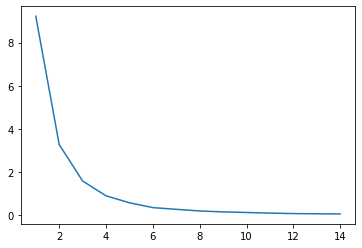

In [49]:
plt.plot(range(1,15),elbow)

In [53]:
ob=KMeans(n_clusters=5)
y_pred=ob.fit_predict(customer[['Annual income_scaled']],customer[['Spending Score_scaled']])

In [54]:
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [55]:
customer['cluster']=y_pred
customer.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Annual income_scaled,Spending Score_scaled,cluster
0,1,Male,19,15,39,0.000000,0.387755,2
1,2,Male,21,15,81,0.000000,0.816327,2
2,3,Female,20,16,6,0.008197,0.051020,2
3,4,Female,23,16,77,0.008197,0.775510,2
4,5,Female,31,17,40,0.016393,0.397959,2
5,6,Female,22,17,76,0.016393,0.765306,2
6,7,Female,35,18,6,0.024590,0.051020,2
7,8,Female,23,18,94,0.024590,0.948980,2
8,9,Male,64,19,3,0.032787,0.020408,2
9,10,Female,30,19,72,0.032787,0.724490,2
